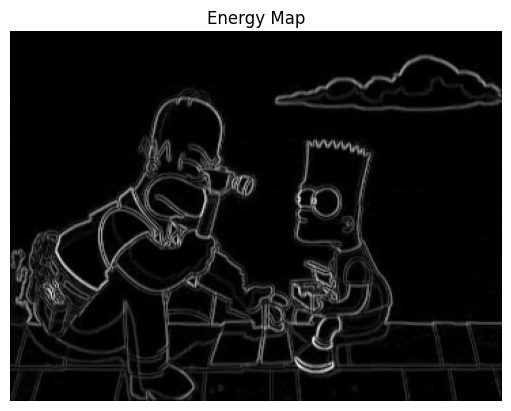

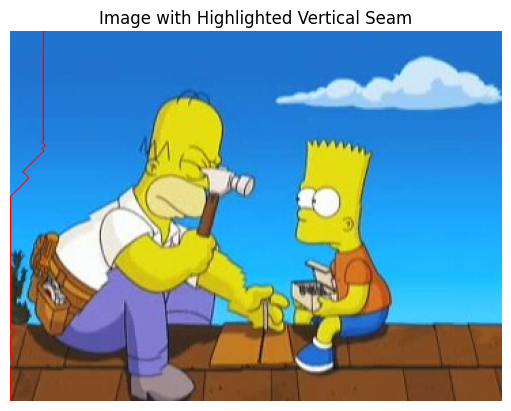

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_energy(img):
    """Calculate the energy map of the image using gradient magnitude."""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    energy = np.absolute(gradient_x) + np.absolute(gradient_y)
    return energy

def find_vertical_seam(energy):
    """Find the vertical seam with the least energy."""
    rows, cols = energy.shape
    seam = np.zeros(rows, dtype=np.int32)
    seam_energy = energy.copy()
    
    # Dynamic programming to calculate minimum seam energy
    for row in range(1, rows):
        for col in range(cols):
            min_energy = seam_energy[row - 1, col]
            if col > 0:
                min_energy = min(min_energy, seam_energy[row - 1, col - 1])
            if col < cols - 1:
                min_energy = min(min_energy, seam_energy[row - 1, col + 1])
            seam_energy[row, col] += min_energy

    # Backtrack to find the seam path
    seam[-1] = np.argmin(seam_energy[-1])
    for row in range(rows - 2, -1, -1):
        prev_col = seam[row + 1]
        min_col = prev_col
        if prev_col > 0 and seam_energy[row, prev_col - 1] < seam_energy[row, min_col]:
            min_col = prev_col - 1
        if prev_col < cols - 1 and seam_energy[row, prev_col + 1] < seam_energy[row, min_col]:
            min_col = prev_col + 1
        seam[row] = min_col
    
    return seam





def highlight_vertical_seam(img, seam):
    """Highlight the vertical seam on the image."""
    img_with_seam = img.copy()
    for row in range(len(seam)):
        col = seam[row]
        img_with_seam[row, col] = [0, 0, 255]  # Mark seam in red
    return img_with_seam

def display_energy_map(energy):
    """Display the energy map of the image."""
    plt.imshow(energy, cmap='gray')
    plt.title('Energy Map')
    plt.axis('off')
    plt.show()

def main(image_path):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print("Image not found!")
        return

    # Compute and display energy map
    energy = compute_energy(img)
    display_energy_map(energy)

    # Find and highlight vertical seam
    vertical_seam = find_vertical_seam(energy)
    img_with_seam = highlight_vertical_seam(img, vertical_seam)

    # Display original image with highlighted seam
    plt.imshow(cv2.cvtColor(img_with_seam, cv2.COLOR_BGR2RGB))
    plt.title('Image with Highlighted Vertical Seam')
    plt.axis('off')
    plt.show()

# Run the script with an image path
image_path = 'buffy.png'  # Replace with your image path
main(image_path)


In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def compute_gradient_energy(img):
#     """Calculate the gradient energy map of the image using gradient magnitude."""
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     # Compute gradients in the x and y directions using Sobel filters
#     gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
#     gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
#     # Calculate the gradient magnitude (energy map)
#     energy = np.absolute(gradient_x) + np.absolute(gradient_y)
    
#     return energy

# def find_vertical_seam(energy):
#     """Find the vertical seam with the least energy using dynamic programming."""
#     rows, cols = energy.shape
#     seam = np.zeros(rows, dtype=np.int32)
#     seam_energy = energy.copy()
    
#     # Dynamic programming to calculate minimum seam energy
#     for row in range(1, rows):
#         for col in range(cols):
#             min_energy = seam_energy[row - 1, col]
#             if col > 0:
#                 min_energy = min(min_energy, seam_energy[row - 1, col - 1])
#             if col < cols - 1:
#                 min_energy = min(min_energy, seam_energy[row - 1, col + 1])
#             seam_energy[row, col] += min_energy

#     # Backtrack to find the seam path
#     seam[-1] = np.argmin(seam_energy[-1])
#     for row in range(rows - 2, -1, -1):
#         prev_col = seam[row + 1]
#         min_col = prev_col
#         if prev_col > 0 and seam_energy[row, prev_col - 1] < seam_energy[row, min_col]:
#             min_col = prev_col - 1
#         if prev_col < cols - 1 and seam_energy[row, prev_col + 1] < seam_energy[row, min_col]:
#             min_col = prev_col + 1
#         seam[row] = min_col
    
#     return seam

# def highlight_vertical_seam(img, seam):
#     """Highlight the vertical seam on the image."""
#     img_with_seam = img.copy()
#     for row in range(len(seam)):
#         col = seam[row]
#         img_with_seam[row, col] = [0, 0, 255]  # Mark seam in red
#     return img_with_seam

# def display_energy_map(energy):
#     """Display the energy map of the image."""
#     plt.imshow(energy, cmap='gray')
#     plt.title('Energy Map')
#     plt.axis('off')
#     plt.show()

# def main(image_path):
#     # Load image
#     img = cv2.imread(image_path)
#     if img is None:
#         print("Image not found!")
#         return

#     # Compute and display energy map
#     energy = compute_gradient_energy(img)
#     display_energy_map(energy)

#     # Find and highlight vertical seam
#     vertical_seam = find_vertical_seam(energy)
#     img_with_seam = highlight_vertical_seam(img, vertical_seam)

#     # Display original image with highlighted seam
#     plt.imshow(cv2.cvtColor(img_with_seam, cv2.COLOR_BGR2RGB))
#     plt.title('Image with Highlighted Vertical Seam')
#     plt.axis('off')
#     plt.show()

# # Run the script with an image path
# image_path = 'buffy.png'  # Replace with your image path
# main(image_path)


: 

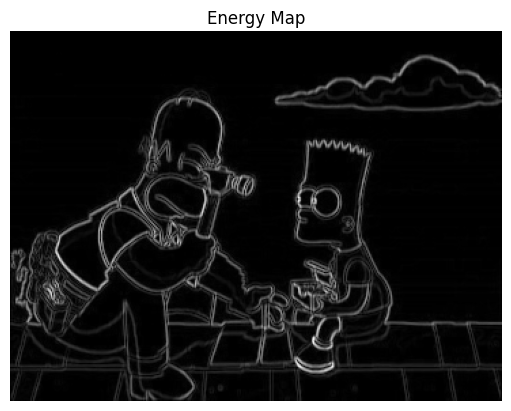

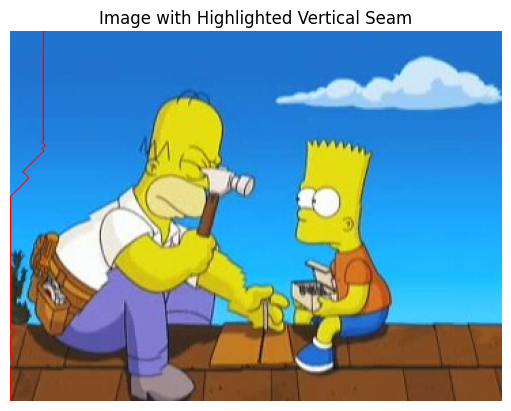

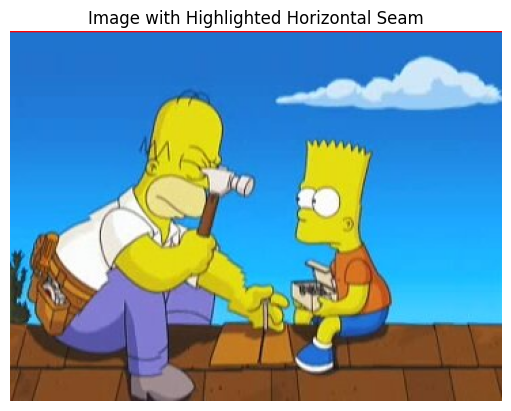

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_energy(img):
    """Calculate the energy map of the image using gradient magnitude."""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    energy = np.absolute(gradient_x) + np.absolute(gradient_y)
    return energy

def find_vertical_seam(energy):
    """Find the vertical seam with the least energy."""
    rows, cols = energy.shape
    seam = np.zeros(rows, dtype=np.int32)
    seam_energy = energy.copy()
    
    # Dynamic programming to calculate minimum seam energy
    for row in range(1, rows):
        for col in range(cols):
            min_energy = seam_energy[row - 1, col] # immediate top
            if col > 0:
                min_energy = min(min_energy, seam_energy[row - 1, col - 1])   ## top left
            if col < cols - 1:
                min_energy = min(min_energy, seam_energy[row - 1, col + 1])   ## top right
            seam_energy[row, col] += min_energy

    # Backtrack to find the seam path
    seam[-1] = np.argmin(seam_energy[-1])
    for row in range(rows - 2, -1, -1):
        prev_col = seam[row + 1]
        min_col = prev_col
        if prev_col > 0 and seam_energy[row, prev_col - 1] < seam_energy[row, min_col]:
            min_col = prev_col - 1
        if prev_col < cols - 1 and seam_energy[row, prev_col + 1] < seam_energy[row, min_col]:
            min_col = prev_col + 1
        seam[row] = min_col
    
    return seam

def find_horizontal_seam(energy):
    """Find the horizontal seam with the least energy."""
    rows, cols = energy.shape
    seam = np.zeros(cols, dtype=np.int32)
    seam_energy = energy.copy()

    # Dynamic programming to calculate minimum seam energy
    for col in range(1, cols):
        for row in range(rows):
            min_energy = seam_energy[row, col - 1]  ###  immediate left
            if row > 0:
                min_energy = min(min_energy, seam_energy[row - 1, col - 1])  ### top left
            if row < rows - 1:
                min_energy = min(min_energy, seam_energy[row + 1, col - 1])  ### bottom left
            seam_energy[row, col] += min_energy

    # Backtrack to find the seam path
    seam[-1] = np.argmin(seam_energy[:, -1])
    for col in range(cols - 2, -1, -1):
        prev_row = seam[col + 1]
        min_row = prev_row
        if prev_row > 0 and seam_energy[prev_row - 1, col] < seam_energy[min_row, col]:
            min_row = prev_row - 1
        if prev_row < rows - 1 and seam_energy[prev_row + 1, col] < seam_energy[min_row, col]:
            min_row = prev_row + 1
        seam[col] = min_row
    
    return seam

def highlight_vertical_seam(img, seam):
    """Highlight the vertical seam on the image."""
    img_with_seam = img.copy()
    for row in range(len(seam)):
        col = seam[row]
        img_with_seam[row, col] = [0, 0, 255]  # Mark seam in red
    return img_with_seam

def highlight_horizontal_seam(img, seam):
    """Highlight the horizontal seam on the image."""
    img_with_seam = img.copy()
    for col in range(len(seam)):
        row = seam[col]
        img_with_seam[row, col] = [0, 0, 255]  # Mark seam in red
    return img_with_seam

def display_energy_map(energy):
    """Display the energy map of the image."""
    plt.imshow(energy, cmap='gray')
    plt.title('Energy Map')
    plt.axis('off')
    plt.show()

def main(image_path):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print("Image not found!")
        return

    # Compute and display energy map
    energy = compute_energy(img)
    display_energy_map(energy)

    # Find and highlight vertical seam
    vertical_seam = find_vertical_seam(energy)
    img_with_vertical_seam = highlight_vertical_seam(img, vertical_seam)

    # Display original image with highlighted vertical seam
    plt.imshow(cv2.cvtColor(img_with_vertical_seam, cv2.COLOR_BGR2RGB))
    plt.title('Image with Highlighted Vertical Seam')
    plt.axis('off')
    plt.show()

    # Find and highlight horizontal seam
    horizontal_seam = find_horizontal_seam(energy)
    img_with_horizontal_seam = highlight_horizontal_seam(img, horizontal_seam)

    # Display original image with highlighted horizontal seam
    plt.imshow(cv2.cvtColor(img_with_horizontal_seam, cv2.COLOR_BGR2RGB))
    plt.title('Image with Highlighted Horizontal Seam')
    plt.axis('off')
    plt.show()

# Run the script with an image path
image_path = 'buffy.png'  # Replace with your image path
main(image_path)


Current image width: 362
Number of seams to remove: 112


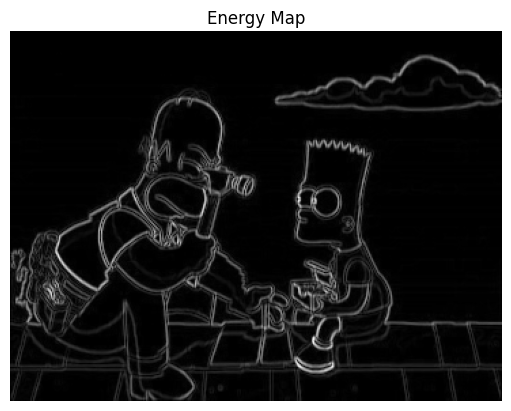

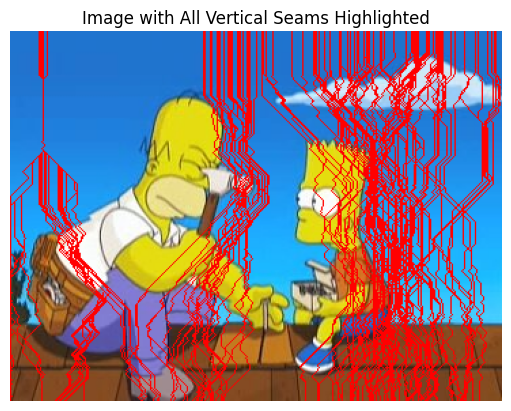

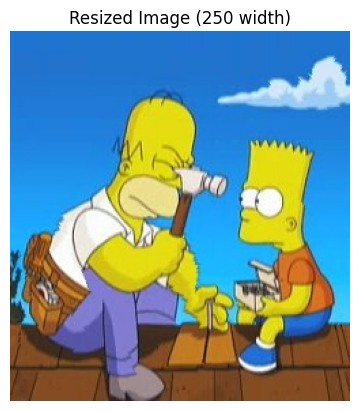

(272, 362, 3)


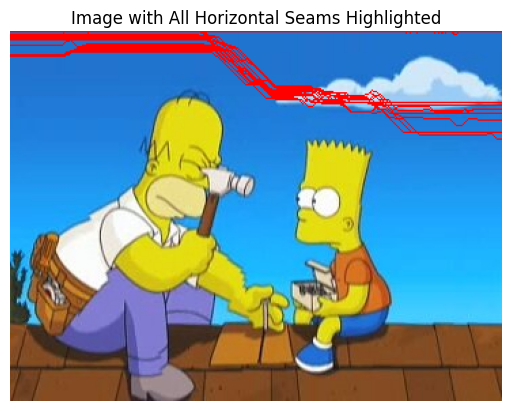

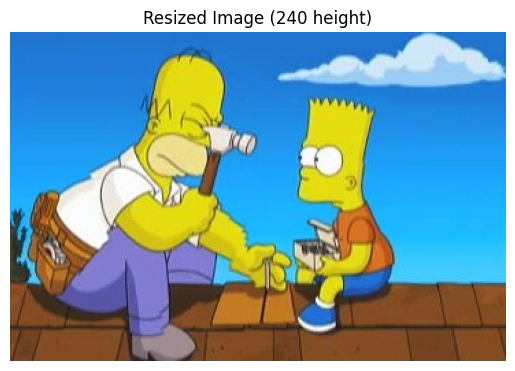

(272, 362, 3)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_energy(img):
    """Calculate the energy map of the image using gradient magnitude."""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    energy = np.absolute(gradient_x) + np.absolute(gradient_y)
    return energy

def find_vertical_seam(energy):  ## USING DYNAMIC PROGRAMMING
    """Find the vertical seam with the least energy."""
    rows, cols = energy.shape
    seam = np.zeros(rows, dtype=np.int32)
    seam_energy = energy.copy()
    
    # Dynamic programming to calculate minimum seam energy
    for row in range(1, rows):
        for col in range(cols):
            min_energy = seam_energy[row - 1, col]
            if col > 0:
                min_energy = min(min_energy, seam_energy[row - 1, col - 1])
            if col < cols - 1:
                min_energy = min(min_energy, seam_energy[row - 1, col + 1])
            seam_energy[row, col] += min_energy

    # Backtrack to find the seam path
    seam[-1] = np.argmin(seam_energy[-1])
    for row in range(rows - 2, -1, -1):
        prev_col = seam[row + 1]
        min_col = prev_col
        if prev_col > 0 and seam_energy[row, prev_col - 1] < seam_energy[row, min_col]:
            min_col = prev_col - 1
        if prev_col < cols - 1 and seam_energy[row, prev_col + 1] < seam_energy[row, min_col]:
            min_col = prev_col + 1
        seam[row] = min_col
    
    return seam

def find_horizontal_seam(energy):   ## USING DYNAMIC PROGRAMMING
    """Find the horizontal seam with the least energy."""
    rows, cols = energy.shape
    seam = np.zeros(cols, dtype=np.int32)
    seam_energy = energy.copy()

    # Dynamic programming to calculate minimum seam energy
    for col in range(1, cols):
        for row in range(rows):
            min_energy = seam_energy[row, col - 1]  ###  immediate left
            if row > 0:
                min_energy = min(min_energy, seam_energy[row - 1, col - 1])  ### top left
            if row < rows - 1:
                min_energy = min(min_energy, seam_energy[row + 1, col - 1])  ### bottom left
            seam_energy[row, col] += min_energy

    # Backtrack to find the seam path
    seam[-1] = np.argmin(seam_energy[:, -1])
    for col in range(cols - 2, -1, -1):
        prev_row = seam[col + 1]
        min_row = prev_row
        if prev_row > 0 and seam_energy[prev_row - 1, col] < seam_energy[min_row, col]:
            min_row = prev_row - 1
        if prev_row < rows - 1 and seam_energy[prev_row + 1, col] < seam_energy[min_row, col]:
            min_row = prev_row + 1
        seam[col] = min_row
    
    return seam


def remove_vertical_seam(img, seam):
    """Remove the vertical seam from the image."""
    rows, cols, _ = img.shape
    img_removed = np.zeros((rows, cols - 1, 3), dtype=np.uint8)  # New image with one less column
    
    for row in range(rows):
        col = seam[row]
        
        # Remove the column from the image by copying all columns except the one in the seam
        img_removed[row, :col] = img[row, :col]  # Copy columns before the seam
        img_removed[row, col:] = img[row, col + 1:]  # Copy columns after the seam
    
    return img_removed


def remove_horizontal_seam(img, seam):
    """Remove the horizontal seam from the image."""
    rows, cols, _ = img.shape
    img_removed = np.zeros((rows - 1, cols, 3), dtype=np.uint8)  # New image with one less row
    
    for col in range(cols):
        # Get the row index to be removed
        row = seam[col]
        
        # Remove the row from the image by copying all rows except the one in the seam
        img_removed[:row, col] = img[:row, col]
        img_removed[row:, col] = img[row + 1:, col]
    
    return img_removed


def highlight_vertical_seams(img, seams):
    """Highlight all vertical seams on the image."""
    img_with_seams = img.copy()
    for seam in seams:
        for row in range(len(seam)):
            col = seam[row]
            img_with_seams[row, col] = [0, 0, 255]  # Mark seams in red
    return img_with_seams

def highlight_horizontal_seams(img, seams):
    """Highlight all horizontal seams on the image."""
    img_with_seams = img.copy()
    for seam in seams:
        for col in range(len(seam)):
            row = seam[col]
            img_with_seams[row, col] = [0, 0, 255]  # Mark seams in red
    return img_with_seams


def display_image(img, title="Image"):
    """Display image using matplotlib."""
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def display_energy_map(energy):
    """Display the energy map of the image."""
    plt.imshow(energy, cmap='gray')
    plt.title('Energy Map')
    plt.axis('off')
    plt.show()

def compute_and_remove_vertical_seams(img, num_seams, target_width):
    """Calculate and remove `num_seams` vertical seams to resize the image."""
    seams = []
    # Compute and store all seams
    for _ in range(num_seams):
        # Compute the energy map
        energy = compute_energy(img)

        # Find the vertical seam with the least energy
        seam = find_vertical_seam(energy)
        seams.append(seam)

        # Remove the seam from the image
        img = remove_vertical_seam(img, seam)
        
        # If we've reduced to the desired width, stop
        if img.shape[1] <= target_width:
            break
    
    return img, seams

def compute_and_remove_horizontal_seams(img, num_seams, target_height):
    """Calculate and remove `num_seams` horizontal seams to resize the image."""
    seams = []
    # Compute and store all seams
    for _ in range(num_seams):
        # Compute the energy map
        energy = compute_energy(img)

        # Find the vertical seam with the least energy
        seam = find_horizontal_seam(energy)
        seams.append(seam)

        # Remove the seam from the image
        img = remove_horizontal_seam(img, seam)
        
        # If we've reduced to the desired width, stop
        if img.shape[0] <= target_height:
            break
    
    return img, seams

def main(image_path, target_width):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print("Image not found!")
        return

    # Get the current width of the image
    current_width = img.shape[1]
    print(f"Current image width: {current_width}")

    # Calculate the number of seams to remove
    num_seams = current_width - target_width
    print(f"Number of seams to remove: {num_seams}")

    energy = compute_energy(img)
    display_energy_map(energy)

    # Calculate and remove seams, also store seams for highlighting
    resized_img, seams = compute_and_remove_vertical_seams(img, num_seams, target_width)

    # Highlight all seams in the original image
    img_with_seams = highlight_vertical_seams(img, seams)
    
    # Display the image with all seams highlighted
    display_image(img_with_seams, "Image with All Vertical Seams Highlighted")

    # Display the resized image
    display_image(resized_img, f"Resized Image ({target_width} width)")
    print(img.shape)


    resized_img, seams = compute_and_remove_horizontal_seams(img, num_seams, target_height)
    # Highlight all seams in the original image
    img_with_seams = highlight_horizontal_seams(img, seams)
    
    # Display the image with all seams highlighted
    display_image(img_with_seams, "Image with All Horizontal Seams Highlighted")

    # Display the resized image
    display_image(resized_img, f"Resized Image ({target_height} height)")
    print(img.shape)

# Run the script with an image path and target width
image_path = 'buffy.png'  # Replace with your image path
target_width = 250  # Desired width after seam removal
target_height = 240
main(image_path, target_width)


### ADDING FUNCTION TO OPTIMALLY DECIDE RESIZING WHERE SEAM IN X AND Y BOTH NEEDS TO BE REMOVED

Current image width: 362
Number of seams to remove: 42


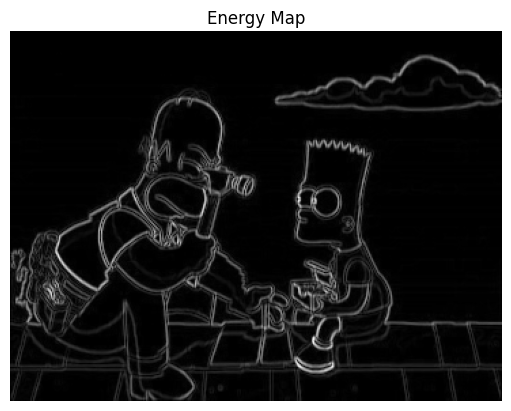

Current dimensions: 362x272
Vertical seams to add: -42, Horizontal seams to add: 48


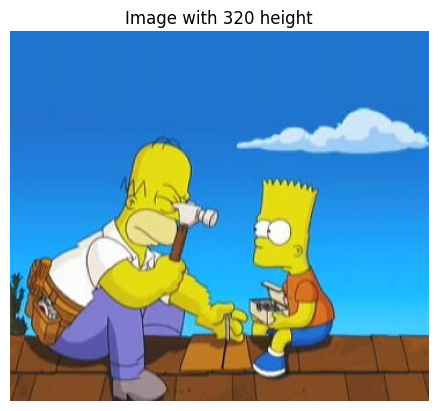

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_energy(img):
    """Calculate the energy map of the image using gradient magnitude."""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    energy = np.absolute(gradient_x) + np.absolute(gradient_y)
    return energy

def find_vertical_seam(energy):  ## USING DYNAMIC PROGRAMMING
    """Find the vertical seam with the least energy."""
    rows, cols = energy.shape
    seam = np.zeros(rows, dtype=np.int32)
    seam_energy = energy.copy()
    
    # Dynamic programming to calculate minimum seam energy
    for row in range(1, rows):
        for col in range(cols):
            min_energy = seam_energy[row - 1, col]
            if col > 0:
                min_energy = min(min_energy, seam_energy[row - 1, col - 1])
            if col < cols - 1:
                min_energy = min(min_energy, seam_energy[row - 1, col + 1])
            seam_energy[row, col] += min_energy

    # Backtrack to find the seam path
    seam[-1] = np.argmin(seam_energy[-1])
    for row in range(rows - 2, -1, -1):
        prev_col = seam[row + 1]
        min_col = prev_col
        if prev_col > 0 and seam_energy[row, prev_col - 1] < seam_energy[row, min_col]:
            min_col = prev_col - 1
        if prev_col < cols - 1 and seam_energy[row, prev_col + 1] < seam_energy[row, min_col]:
            min_col = prev_col + 1
        seam[row] = min_col
    
    return seam

def find_horizontal_seam(energy):   ## USING DYNAMIC PROGRAMMING
    """Find the horizontal seam with the least energy."""
    rows, cols = energy.shape
    seam = np.zeros(cols, dtype=np.int32)
    seam_energy = energy.copy()

    # Dynamic programming to calculate minimum seam energy
    for col in range(1, cols):
        for row in range(rows):
            min_energy = seam_energy[row, col - 1]  ###  immediate left
            if row > 0:
                min_energy = min(min_energy, seam_energy[row - 1, col - 1])  ### top left
            if row < rows - 1:
                min_energy = min(min_energy, seam_energy[row + 1, col - 1])  ### bottom left
            seam_energy[row, col] += min_energy

    # Backtrack to find the seam path
    seam[-1] = np.argmin(seam_energy[:, -1])
    for col in range(cols - 2, -1, -1):
        prev_row = seam[col + 1]
        min_row = prev_row
        if prev_row > 0 and seam_energy[prev_row - 1, col] < seam_energy[min_row, col]:
            min_row = prev_row - 1
        if prev_row < rows - 1 and seam_energy[prev_row + 1, col] < seam_energy[min_row, col]:
            min_row = prev_row + 1
        seam[col] = min_row
    
    return seam


def remove_vertical_seam(img, seam):
    """Remove the vertical seam from the image."""
    rows, cols, _ = img.shape
    img_removed = np.zeros((rows, cols - 1, 3), dtype=np.uint8)  # New image with one less column
    
    for row in range(rows):
        col = seam[row]
        
        # Remove the column from the image by copying all columns except the one in the seam
        img_removed[row, :col] = img[row, :col]  # Copy columns before the seam
        img_removed[row, col:] = img[row, col + 1:]  # Copy columns after the seam
    
    return img_removed


def remove_horizontal_seam(img, seam):
    """Remove the horizontal seam from the image."""
    rows, cols, _ = img.shape
    img_removed = np.zeros((rows - 1, cols, 3), dtype=np.uint8)  # New image with one less row
    
    for col in range(cols):
        # Get the row index to be removed
        row = seam[col]
        
        # Remove the row from the image by copying all rows except the one in the seam
        img_removed[:row, col] = img[:row, col]
        img_removed[row:, col] = img[row + 1:, col]
    
    return img_removed


def highlight_vertical_seams(img, seams):
    """Highlight all vertical seams on the image."""
    img_with_seams = img.copy()
    for seam in seams:
        for row in range(len(seam)):
            col = seam[row]
            img_with_seams[row, col] = [0, 0, 255]  # Mark seams in red
    return img_with_seams

def highlight_horizontal_seams(img, seams):
    """Highlight all horizontal seams on the image."""
    img_with_seams = img.copy()
    for seam in seams:
        for col in range(len(seam)):
            row = seam[col]
            img_with_seams[row, col] = [0, 0, 255]  # Mark seams in red
    return img_with_seams


def display_image(img, title="Image"):
    """Display image using matplotlib."""
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def display_energy_map(energy):
    """Display the energy map of the image."""
    plt.imshow(energy, cmap='gray')
    plt.title('Energy Map')
    plt.axis('off')
    plt.show()

def compute_and_remove_vertical_seams(img, num_seams, target_width):
    """Calculate and remove `num_seams` vertical seams to resize the image."""
    seams = []
    # Compute and store all seams
    for _ in range(num_seams):
        # Compute the energy map
        energy = compute_energy(img)

        # Find the vertical seam with the least energy
        seam = find_vertical_seam(energy)
        seams.append(seam)

        # Remove the seam from the image
        img = remove_vertical_seam(img, seam)
        
        # If we've reduced to the desired width, stop
        if img.shape[1] <= target_width:
            break
    
    return img, seams

def compute_and_remove_horizontal_seams(img, num_seams, target_height):
    """Calculate and remove `num_seams` horizontal seams to resize the image."""
    seams = []
    # Compute and store all seams
    for _ in range(num_seams):
        # Compute the energy map
        energy = compute_energy(img)

        # Find the vertical seam with the least energy
        seam = find_horizontal_seam(energy)
        seams.append(seam)

        # Remove the seam from the image
        img = remove_horizontal_seam(img, seam)
        
        # If we've reduced to the desired width, stop
        if img.shape[0] <= target_height:
            break
    
    return img, seams



def compute_transport_map(img, target_width, target_height):
    """Calculate the transport map to find the optimal order of seam removal."""
    original_height, original_width = img.shape[:2]
    r, c = original_height - target_height, original_width - target_width  # Rows and cols to remove
    
    # Initialize transport map T with large initial values
    T = np.full((r + 1, c + 1), np.inf)
    T[0, 0] = 0  # Starting point

    # Dynamic programming to fill the transport map
    for i in range(r + 1):
        for j in range(c + 1):
            if i > 0:  # removing a horizontal seam
                T[i, j] = min(T[i, j], T[i - 1, j] + np.sum(compute_energy(remove_horizontal_seam(img, find_horizontal_seam(compute_energy(img))))))
            if j > 0:  # or removing a vertical seam
                T[i, j] = min(T[i, j], T[i, j - 1] + np.sum(compute_energy(remove_vertical_seam(img, find_vertical_seam(compute_energy(img))))))

    return T


def backtrack_seam_order(T):
    """Backtrack the transport map to determine the optimal seam removal order."""
    r, c = T.shape
    r, c = r - 1, c - 1
    seam_order = []

    # Backtracking from the target dimensions to the original dimensions
    while r > 0 or c > 0:
        if r > 0 and (c == 0 or T[r - 1, c] < T[r, c - 1]):
            seam_order.append('horizontal')
            r -= 1
        else:
            seam_order.append('vertical')
            c -= 1

    return seam_order[::-1]  # Reverse to get the correct order


def resize_image_optimal(img, target_width, target_height):
    """Resize image to target dimensions using optimal seam removal order."""
    T = compute_transport_map(img, target_width, target_height)
    seam_order = backtrack_seam_order(T)

    for seam_type in seam_order:
        energy = compute_energy(img)
        if seam_type == 'horizontal':
            seam = find_horizontal_seam(energy)
            img = remove_horizontal_seam(img, seam)
        else:
            seam = find_vertical_seam(energy)
            img = remove_vertical_seam(img, seam)

    return img



def add_vertical_seam(img, seam):
    """Add a vertical seam to the image by duplicating the pixels along the seam."""
    rows, cols, _ = img.shape
    img_added = np.zeros((rows, cols + 1, 3), dtype=np.uint8)

    for row in range(rows):
        col = seam[row]
        for ch in range(3):  # For each color channel
            img_added[row, :col, ch] = img[row, :col, ch]  # Copy left of the seam
            img_added[row, col, ch] = img[row, col, ch]  # Duplicate seam pixel
            img_added[row, col + 1:, ch] = img[row, col:, ch]  # Copy right of the seam

    return img_added


def add_horizontal_seam(img, seam):
    """Add a horizontal seam to the image by duplicating the pixels along the seam."""
    rows, cols, _ = img.shape
    img_added = np.zeros((rows + 1, cols, 3), dtype=np.uint8)

    for col in range(cols):
        row = seam[col]
        for ch in range(3):  # For each color channel
            img_added[:row, col, ch] = img[:row, col, ch]  # Copy above the seam
            img_added[row, col, ch] = img[row, col, ch]  # Duplicate seam pixel
            img_added[row + 1:, col, ch] = img[row:, col, ch]  # Copy below the seam

    return img_added


def compute_and_add_vertical_seams(img, num_seams):
    """Calculate and add `num_seams` vertical seams to enlarge the image."""
    for _ in range(num_seams):
        energy = compute_energy(img)
        seam = find_vertical_seam(energy)
        img = add_vertical_seam(img, seam)
    return img


def compute_and_add_horizontal_seams(img, num_seams):
    """Calculate and add `num_seams` horizontal seams to enlarge the image."""
    for _ in range(num_seams):
        energy = compute_energy(img)
        seam = find_horizontal_seam(energy)
        img = add_horizontal_seam(img, seam)
    return img




def main(image_path, target_width):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print("Image not found!")
        return

    # Get the current width of the image
    current_width = img.shape[1]
    print(f"Current image width: {current_width}")

    # Calculate the number of seams to remove
    num_seams = current_width - target_width
    print(f"Number of seams to remove: {num_seams}")

    energy = compute_energy(img)
    display_energy_map(energy)





    #### IMAGE REDUCTION EITHER X OR Y 
    # Calculate and remove seams, also store seams for highlighting
    resized_img, seams = compute_and_remove_vertical_seams(img, num_seams, target_width)

    # Highlight all seams in the original image
    img_with_seams = highlight_vertical_seams(img, seams)
    
    # Display the image with all seams highlighted
    display_image(img_with_seams, "Image with All Vertical Seams Highlighted")

    # Display the resized image
    display_image(resized_img, f"Resized Image ({target_width} width)")
    print(img.shape)

    resized_img, seams = compute_and_remove_horizontal_seams(img, num_seams, target_height)
    # Highlight all seams in the original image
    img_with_seams = highlight_horizontal_seams(img, seams)
    
    # Display the image with all seams highlighted
    display_image(img_with_seams, "Image with All Horizontal Seams Highlighted")

    # Display the resized image
    display_image(resized_img, f"Resized Image ({target_height} height)")
    print(img.shape)




    ### IMAGE REDUCTION BOTH X AND Y
    # Image resizing in both x and y using transport map
    optimal_resized_img = resize_image_optimal(img, target_width, target_height)
    display_image(optimal_resized_img, f"Optimally Resized Image ({target_width}x{target_height})")




    ### IMAGE ENLARGEMENT
    # Get the current dimensions of the image
    current_width, current_height = img.shape[1], img.shape[0]
    print(f"Current dimensions: {current_width}x{current_height}")

    # Calculate the number of seams to add for enlargement
    num_vertical_seams = target_width - current_width
    num_horizontal_seams = target_height - current_height
    print(f"Vertical seams to add: {num_vertical_seams}, Horizontal seams to add: {num_horizontal_seams}")

    # Add vertical seams
    if num_vertical_seams > 0:
        img_with_vertical_seams = compute_and_add_vertical_seams(img, num_vertical_seams)
        display_image(img_with_vertical_seams, f"Image with {target_width} width")

    # Add horizontal seams
    if num_horizontal_seams > 0:
        img_with_horizontal_seams = compute_and_add_horizontal_seams(img, num_horizontal_seams)
        display_image(img_with_horizontal_seams, f"Image with {target_height} height")

# Run the script with an image path and target width
image_path = 'buffy.png'  # Replace with your image path
target_width = 250  # Desired width after seam removal
target_height = 240
main(image_path, target_width)


Current image width: 362
Number of seams to remove: -18


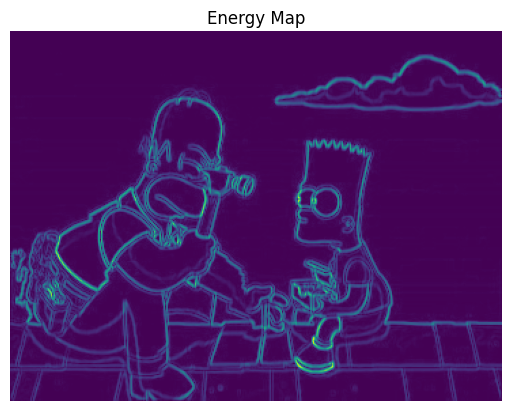

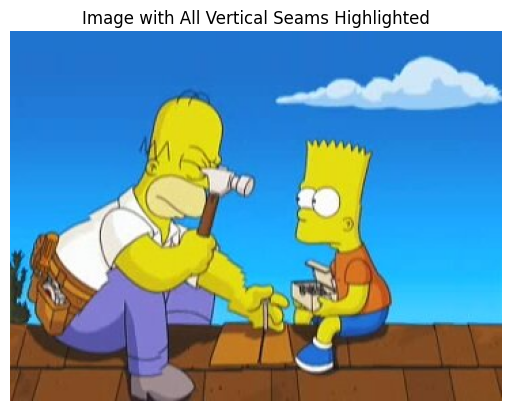

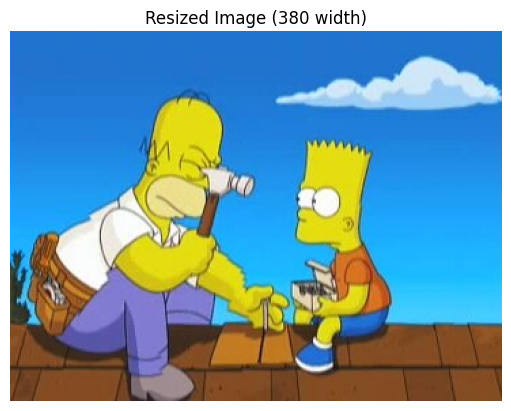

(272, 362, 3)


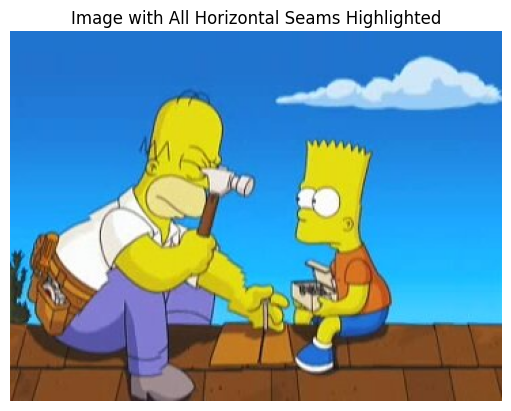

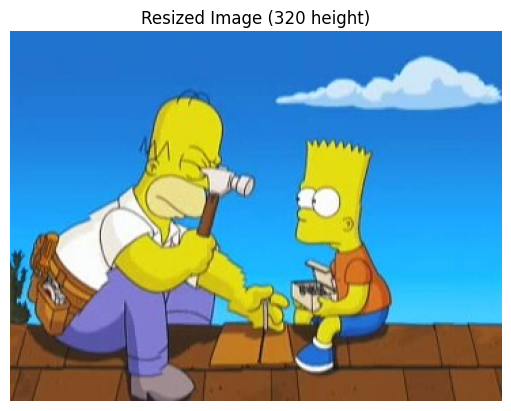

(272, 362, 3)


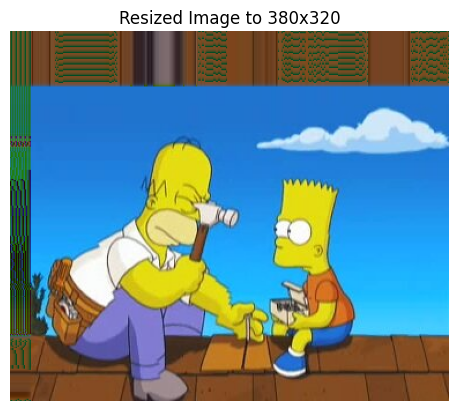

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_energy(img):
    """Calculate the energy map of the image using gradient magnitude."""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    energy = np.absolute(gradient_x) + np.absolute(gradient_y)
    return energy

def find_vertical_seam(energy):  ## USING DYNAMIC PROGRAMMING
    """Find the vertical seam with the least energy."""
    rows, cols = energy.shape
    seam = np.zeros(rows, dtype=np.int32)
    seam_energy = energy.copy()
    
    # Dynamic programming to calculate minimum seam energy
    for row in range(1, rows):
        for col in range(cols):
            min_energy = seam_energy[row - 1, col]
            if col > 0:
                min_energy = min(min_energy, seam_energy[row - 1, col - 1])
            if col < cols - 1:
                min_energy = min(min_energy, seam_energy[row - 1, col + 1])
            seam_energy[row, col] += min_energy

    # Backtrack to find the seam path
    seam[-1] = np.argmin(seam_energy[-1])
    for row in range(rows - 2, -1, -1):
        prev_col = seam[row + 1]
        min_col = prev_col
        if prev_col > 0 and seam_energy[row, prev_col - 1] < seam_energy[row, min_col]:
            min_col = prev_col - 1
        if prev_col < cols - 1 and seam_energy[row, prev_col + 1] < seam_energy[row, min_col]:
            min_col = prev_col + 1
        seam[row] = min_col
    
    return seam

def find_horizontal_seam(energy):   ## USING DYNAMIC PROGRAMMING
    """Find the horizontal seam with the least energy."""
    rows, cols = energy.shape
    seam = np.zeros(cols, dtype=np.int32)
    seam_energy = energy.copy()

    # Dynamic programming to calculate minimum seam energy
    for col in range(1, cols):
        for row in range(rows):
            min_energy = seam_energy[row, col - 1]  ###  immediate left
            if row > 0:
                min_energy = min(min_energy, seam_energy[row - 1, col - 1])  ### top left
            if row < rows - 1:
                min_energy = min(min_energy, seam_energy[row + 1, col - 1])  ### bottom left
            seam_energy[row, col] += min_energy

    # Backtrack to find the seam path
    seam[-1] = np.argmin(seam_energy[:, -1])
    for col in range(cols - 2, -1, -1):
        prev_row = seam[col + 1]
        min_row = prev_row
        if prev_row > 0 and seam_energy[prev_row - 1, col] < seam_energy[min_row, col]:
            min_row = prev_row - 1
        if prev_row < rows - 1 and seam_energy[prev_row + 1, col] < seam_energy[min_row, col]:
            min_row = prev_row + 1
        seam[col] = min_row
    
    return seam


def remove_vertical_seam(img, seam):
    """Remove the vertical seam from the image."""
    rows, cols, _ = img.shape
    img_removed = np.zeros((rows, cols - 1, 3), dtype=np.uint8)  # New image with one less column
    
    for row in range(rows):
        col = seam[row]
        
        # Remove the column from the image by copying all columns except the one in the seam
        img_removed[row, :col] = img[row, :col]  # Copy columns before the seam
        img_removed[row, col:] = img[row, col + 1:]  # Copy columns after the seam
    
    return img_removed


def remove_horizontal_seam(img, seam):
    """Remove the horizontal seam from the image."""
    rows, cols, _ = img.shape
    img_removed = np.zeros((rows - 1, cols, 3), dtype=np.uint8)  # New image with one less row
    
    for col in range(cols):
        # Get the row index to be removed
        row = seam[col]
        
        # Remove the row from the image by copying all rows except the one in the seam
        img_removed[:row, col] = img[:row, col]
        img_removed[row:, col] = img[row + 1:, col]
    
    return img_removed


def highlight_vertical_seams(img, seams):
    """Highlight all vertical seams on the image."""
    img_with_seams = img.copy()
    for seam in seams:
        for row in range(len(seam)):
            col = seam[row]
            img_with_seams[row, col] = [0, 0, 255]  # Mark seams in red
    return img_with_seams

def highlight_horizontal_seams(img, seams):
    """Highlight all horizontal seams on the image."""
    img_with_seams = img.copy()
    for seam in seams:
        for col in range(len(seam)):
            row = seam[col]
            img_with_seams[row, col] = [0, 0, 255]  # Mark seams in red
    return img_with_seams


def display_image(img, title="Image"):
    """Display image using matplotlib."""
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def display_energy_map(energy):
    """Display the energy map of the image."""
    plt.imshow(energy)
    plt.title('Energy Map')
    plt.axis('off')
    plt.show()

def compute_and_remove_vertical_seams(img, num_seams, target_width):
    """Calculate and remove `num_seams` vertical seams to resize the image."""
    seams = []
    # Compute and store all seams
    for _ in range(num_seams):
        # Compute the energy map
        energy = compute_energy(img)

        # Find the vertical seam with the least energy
        seam = find_vertical_seam(energy)
        seams.append(seam)

        # Remove the seam from the image
        img = remove_vertical_seam(img, seam)
        
        # If we've reduced to the desired width, stop
        if img.shape[1] <= target_width:
            break
    
    return img, seams

def compute_and_remove_horizontal_seams(img, num_seams, target_height):
    """Calculate and remove `num_seams` horizontal seams to resize the image."""
    seams = []
    # Compute and store all seams
    for _ in range(num_seams):
        # Compute the energy map
        energy = compute_energy(img)

        # Find the vertical seam with the least energy
        seam = find_horizontal_seam(energy)
        seams.append(seam)

        # Remove the seam from the image
        img = remove_horizontal_seam(img, seam)
        
        # If we've reduced to the desired width, stop
        if img.shape[0] <= target_height:
            break
    
    return img, seams



def compute_transport_map(img, target_width, target_height):
    """Calculate the transport map to find the optimal order of seam removal."""
    original_height, original_width = img.shape[:2]
    r, c = original_height - target_height, original_width - target_width  # Rows and cols to remove
    
    # Initialize transport map T with large initial values
    T = np.full((r + 1, c + 1), np.inf)
    T[0, 0] = 0  # Starting point

    # Dynamic programming to fill the transport map
    for i in range(r + 1):
        for j in range(c + 1):
            if i > 0:  # removing a horizontal seam
                T[i, j] = min(T[i, j], T[i - 1, j] + np.sum(compute_energy(remove_horizontal_seam(img, find_horizontal_seam(compute_energy(img))))))
            if j > 0:  # or removing a vertical seam
                T[i, j] = min(T[i, j], T[i, j - 1] + np.sum(compute_energy(remove_vertical_seam(img, find_vertical_seam(compute_energy(img))))))

    return T


def backtrack_seam_order(T):
    """Backtrack the transport map to determine the optimal seam removal order."""
    r, c = T.shape
    r, c = r - 1, c - 1
    seam_order = []

    # Backtracking from the target dimensions to the original dimensions
    while r > 0 or c > 0:
        if r > 0 and (c == 0 or T[r - 1, c] < T[r, c - 1]):
            seam_order.append('horizontal')
            r -= 1
        else:
            seam_order.append('vertical')
            c -= 1

    return seam_order[::-1]  # Reverse to get the correct order


def resize_image_optimal(img, target_width, target_height):
    """Resize image to target dimensions using optimal seam removal order."""
    T = compute_transport_map(img, target_width, target_height)
    seam_order = backtrack_seam_order(T)

    for seam_type in seam_order:
        energy = compute_energy(img)
        if seam_type == 'horizontal':
            seam = find_horizontal_seam(energy)
            img = remove_horizontal_seam(img, seam)
        else:
            seam = find_vertical_seam(energy)
            img = remove_vertical_seam(img, seam)

    return img



def add_vertical_seam(img, seam):
    """Add a vertical seam to the image by duplicating the pixels along the seam."""
    rows, cols, _ = img.shape
    img_added = np.zeros((rows, cols + 1, 3), dtype=np.uint8)

    for row in range(rows):
        col = seam[row]
        for ch in range(3):  # For each color channel
            img_added[row, :col, ch] = img[row, :col, ch]  # Copy left of the seam
            img_added[row, col, ch] = img[row, col, ch]  # Duplicate seam pixel
            img_added[row, col + 1:, ch] = img[row, col:, ch]  # Copy right of the seam

    return img_added


def add_horizontal_seam(img, seam):
    """Add a horizontal seam to the image by duplicating the pixels along the seam."""
    rows, cols, _ = img.shape
    img_added = np.zeros((rows + 1, cols, 3), dtype=np.uint8)

    for col in range(cols):
        row = seam[col]
        for ch in range(3):  # For each color channel
            img_added[:row, col, ch] = img[:row, col, ch]  # Copy above the seam
            img_added[row, col, ch] = img[row, col, ch]  # Duplicate seam pixel
            img_added[row + 1:, col, ch] = img[row:, col, ch]  # Copy below the seam

    return img_added


def compute_and_add_vertical_seams(img, num_seams):
    """Calculate and add `num_seams` vertical seams to enlarge the image."""
    for _ in range(num_seams):
        energy = compute_energy(img)
        seam = find_vertical_seam(energy)
        img = add_vertical_seam(img, seam)
    return img


def compute_and_add_horizontal_seams(img, num_seams):
    """Calculate and add `num_seams` horizontal seams to enlarge the image."""
    for _ in range(num_seams):
        energy = compute_energy(img)
        seam = find_horizontal_seam(energy)
        img = add_horizontal_seam(img, seam)
    return img



def content_amplification(img, scale_factor, target_width, target_height):
    """
    Amplify image content while preserving its size.
    1. Scale up the image using standard scaling.
    2. Use seam carving to reduce the scaled image back to the original size.
    """
    # Step 1: Scale the image up
    scaled_width = int(img.shape[1] * scale_factor)
    scaled_height = int(img.shape[0] * scale_factor)
    scaled_img = cv2.resize(img, (scaled_width, scaled_height), interpolation=cv2.INTER_LINEAR)

    print(f"Scaled Image Dimensions: {scaled_img.shape[1]}x{scaled_img.shape[0]}")

    # Step 2: Use seam carving to reduce the scaled image to the original size
    amplified_img = resize_image_optimal(scaled_img, target_width, target_height)
    
    return amplified_img


def retarget_image(img, vertical_seam, horizontal_seam, new_width, new_height):
    """Retarget the image to a new size by removing seams."""
    rows, cols, _ = img.shape
    resized_img = img.copy()

    # Reduce or expand width
    if new_width < cols:
        for _ in range(cols - new_width):
            seam = vertical_seam
            resized_img = np.delete(resized_img, seam[-1], axis=1)
            vertical_seam = np.delete(vertical_seam, -1)  # Update the seam index after deletion
    elif new_width > cols:
        for _ in range(new_width - cols):
            seam = vertical_seam
            new_pixels = (resized_img[:, seam[-1] - 1, :] + resized_img[:, seam[-1], :]) // 2
            resized_img = np.insert(resized_img, seam[-1], new_pixels, axis=1)
            vertical_seam = np.insert(vertical_seam, -1, seam[-1])  # Update the seam after insertion

    # Reduce or expand height
    if new_height < rows:
        for _ in range(rows - new_height):
            seam = horizontal_seam
            resized_img = np.delete(resized_img, seam[-1], axis=0)
            horizontal_seam = np.delete(horizontal_seam, -1)  # Update the seam index after deletion
    elif new_height > rows:
        for _ in range(new_height - rows):
            seam = horizontal_seam
            new_pixels = (resized_img[seam[-1] - 1, :, :] + resized_img[seam[-1], :, :]) // 2
            resized_img = np.insert(resized_img, seam[-1], new_pixels, axis=0)
            horizontal_seam = np.insert(horizontal_seam, -1, seam[-1])  # Update the seam after insertion

    return resized_img




def main(image_path, target_width, scale_factor):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print("Image not found!")
        return

    # Get the current width of the image
    current_width = img.shape[1]
    print(f"Current image width: {current_width}")

    # Calculate the number of seams to remove
    num_seams = current_width - target_width
    print(f"Number of seams to remove: {num_seams}")

    energy = compute_energy(img)
    display_energy_map(energy)





    #### IMAGE REDUCTION EITHER X OR Y 
    # Calculate and remove seams, also store seams for highlighting
    resized_img, seams = compute_and_remove_vertical_seams(img, num_seams, target_width)

    # Highlight all seams in the original image
    img_with_seams = highlight_vertical_seams(img, seams)
    
    # Display the image with all seams highlighted
    display_image(img_with_seams, "Image with All Vertical Seams Highlighted")

    # Display the resized image
    display_image(resized_img, f"Resized Image ({target_width} width)")
    print(img.shape)

    resized_img, seams = compute_and_remove_horizontal_seams(img, num_seams, target_height)
    # Highlight all seams in the original image
    img_with_seams = highlight_horizontal_seams(img, seams)
    
    # Display the image with all seams highlighted
    display_image(img_with_seams, "Image with All Horizontal Seams Highlighted")

    # Display the resized image
    display_image(resized_img, f"Resized Image ({target_height} height)")
    print(img.shape)




    ### IMAGE REDUCTION BOTH X AND Y (WILL TAKE 15 TO 20 MINS)
    # Image resizing in both x and y using transport map
    optimal_resized_img = resize_image_optimal(img, target_width, target_height)
    display_image(optimal_resized_img, f"Optimally Resized Image ({target_width}x{target_height})")




    ### IMAGE ENLARGEMENT EITHER X OOR Y
    # Get the current dimensions of the image
    current_width, current_height = img.shape[1], img.shape[0]
    print(f"Current dimensions: {current_width}x{current_height}")

    # Calculate the number of seams to add for enlargement
    num_vertical_seams = target_width - current_width
    num_horizontal_seams = target_height - current_height
    print(f"Vertical seams to add: {num_vertical_seams}, Horizontal seams to add: {num_horizontal_seams}")

    # Add vertical seams
    if num_vertical_seams > 0:
        img_with_vertical_seams = compute_and_add_vertical_seams(img, num_vertical_seams)
        display_image(img_with_vertical_seams, f"Image with {target_width} width")

    # Add horizontal seams
    if num_horizontal_seams > 0:
        img_with_horizontal_seams = compute_and_add_horizontal_seams(img, num_horizontal_seams)
        display_image(img_with_horizontal_seams, f"Image with {target_height} height")


    ### IMAGE ENLARGEMENT IN X AND Y (Take around 30-40 mins)
    current_width, current_height = img.shape[1], img.shape[0]
    print(f"Original Image Dimensions: {current_width}x{current_height}")

    # Perform content amplification
    amplified_img = content_amplification(img, scale_factor, current_width, current_height)

    # Display the amplified image
    display_image(amplified_img, "Content Amplified Image")




    ##### MUTI IMAGE RESIZING
    # Compute energy map
    energy = compute_energy(img)

    # Find the vertical and horizontal seams
    vertical_seam = find_vertical_seam(energy)
    horizontal_seam = find_horizontal_seam(energy)

    # Retarget the image
    resized_img = retarget_image(img, vertical_seam, horizontal_seam, target_width, target_height)
    display_image(resized_img, f"Resized Image to {target_width}x{target_height}")

    


# Run the script with an image path and target width
image_path = 'buffy.png'  # Replace with your image path
target_width = 380  # Desired width after seam removal
target_height = 320
scale_factor = 1.1
main(image_path, target_width, scale_factor)


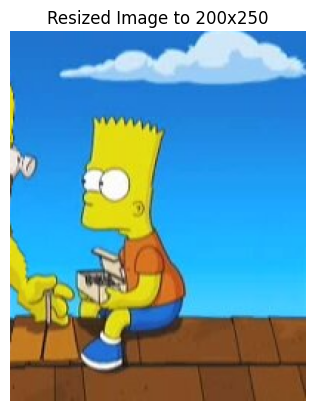

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_energy(img):
    """Calculate the energy map of the image using gradient magnitude."""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    energy = np.absolute(gradient_x) + np.absolute(gradient_y)
    return energy

def find_vertical_seam(energy):
    """Find the vertical seam with the least energy."""
    rows, cols = energy.shape
    seam = np.zeros(rows, dtype=np.int32)
    seam_energy = energy.copy()
    
    # Dynamic programming to calculate minimum seam energy
    for row in range(1, rows):
        for col in range(cols):
            min_energy = seam_energy[row - 1, col] # immediate top
            if col > 0:
                min_energy = min(min_energy, seam_energy[row - 1, col - 1])   ## top left
            if col < cols - 1:
                min_energy = min(min_energy, seam_energy[row - 1, col + 1])   ## top right
            seam_energy[row, col] += min_energy

    # Backtrack to find the seam path
    seam[-1] = np.argmin(seam_energy[-1])
    for row in range(rows - 2, -1, -1):
        prev_col = seam[row + 1]
        min_col = prev_col
        if prev_col > 0 and seam_energy[row, prev_col - 1] < seam_energy[row, min_col]:
            min_col = prev_col - 1
        if prev_col < cols - 1 and seam_energy[row, prev_col + 1] < seam_energy[row, min_col]:
            min_col = prev_col + 1
        seam[row] = min_col
    
    return seam

def find_horizontal_seam(energy):
    """Find the horizontal seam with the least energy."""
    rows, cols = energy.shape
    seam = np.zeros(cols, dtype=np.int32)
    seam_energy = energy.copy()

    # Dynamic programming to calculate minimum seam energy
    for col in range(1, cols):
        for row in range(rows):
            min_energy = seam_energy[row, col - 1]  ###  immediate left
            if row > 0:
                min_energy = min(min_energy, seam_energy[row - 1, col - 1])  ### top left
            if row < rows - 1:
                min_energy = min(min_energy, seam_energy[row + 1, col - 1])  ### bottom left
            seam_energy[row, col] += min_energy

    # Backtrack to find the seam path
    seam[-1] = np.argmin(seam_energy[:, -1])
    for col in range(cols - 2, -1, -1):
        prev_row = seam[col + 1]
        min_row = prev_row
        if prev_row > 0 and seam_energy[prev_row - 1, col] < seam_energy[min_row, col]:
            min_row = prev_row - 1
        if prev_row < rows - 1 and seam_energy[prev_row + 1, col] < seam_energy[min_row, col]:
            min_row = prev_row + 1
        seam[col] = min_row
    
    return seam

def highlight_vertical_seam(img, seam):
    """Highlight the vertical seam on the image."""
    img_with_seam = img.copy()
    for row in range(len(seam)):
        col = seam[row]
        img_with_seam[row, col] = [0, 0, 255]  # Mark seam in red
    return img_with_seam

def highlight_horizontal_seam(img, seam):
    """Highlight the horizontal seam on the image."""
    img_with_seam = img.copy()
    for col in range(len(seam)):
        row = seam[col]
        img_with_seam[row, col] = [0, 0, 255]  # Mark seam in red
    return img_with_seam

def display_energy_map(energy):
    """Display the energy map of the image."""
    plt.imshow(energy, cmap='gray')
    plt.title('Energy Map')
    plt.axis('off')
    plt.show()

def retarget_image(img, vertical_seam, horizontal_seam, new_width, new_height):
    """Retarget the image to a new size by removing seams."""
    rows, cols, _ = img.shape
    resized_img = img.copy()

    # Reduce or expand width
    if new_width < cols:
        for _ in range(cols - new_width):
            seam = vertical_seam
            resized_img = np.delete(resized_img, seam[-1], axis=1)
            vertical_seam = np.delete(vertical_seam, -1)  # Update the seam index after deletion
    elif new_width > cols:
        for _ in range(new_width - cols):
            seam = vertical_seam
            new_pixels = (resized_img[:, seam[-1] - 1, :] + resized_img[:, seam[-1], :]) // 2
            resized_img = np.insert(resized_img, seam[-1], new_pixels, axis=1)
            vertical_seam = np.insert(vertical_seam, -1, seam[-1])  # Update the seam after insertion

    # Reduce or expand height
    if new_height < rows:
        for _ in range(rows - new_height):
            seam = horizontal_seam
            resized_img = np.delete(resized_img, seam[-1], axis=0)
            horizontal_seam = np.delete(horizontal_seam, -1)  # Update the seam index after deletion
    elif new_height > rows:
        for _ in range(new_height - rows):
            seam = horizontal_seam
            new_pixels = (resized_img[seam[-1] - 1, :, :] + resized_img[seam[-1], :, :]) // 2
            resized_img = np.insert(resized_img, seam[-1], new_pixels, axis=0)
            horizontal_seam = np.insert(horizontal_seam, -1, seam[-1])  # Update the seam after insertion

    return resized_img


def main(image_path, new_width, new_height):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print("Image not found!")
        return

    # Compute energy map
    energy = compute_energy(img)

    # Find the vertical and horizontal seams
    vertical_seam = find_vertical_seam(energy)
    horizontal_seam = find_horizontal_seam(energy)

    # Retarget the image
    resized_img = retarget_image(img, vertical_seam, horizontal_seam, new_width, new_height)

    # Display the resized image
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Resized Image to {new_width}x{new_height}')
    plt.axis('off')
    plt.show()

# Run the script with an image path and new dimensions
image_path = 'buffy.png'  # Replace with your image path
new_width = 200         # Desired width
new_height = 250         # Desired height
main(image_path, new_width, new_height)


In [ ]:
#### CHANGED ##################################

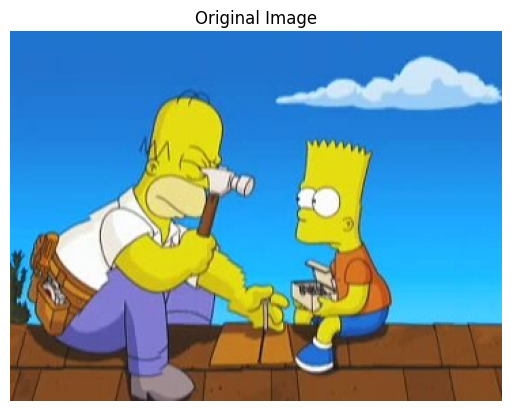

Current image width: 362 272
Number of seams to remove: -238


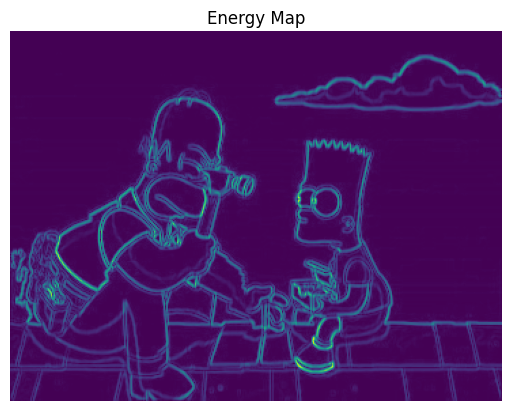

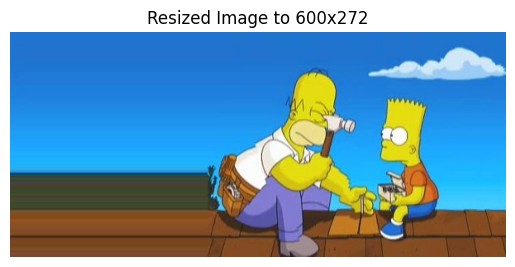

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Calculate the energy map of the image using gradient magnitude.
def compute_energy(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    energy = np.absolute(gradient_x) + np.absolute(gradient_y)
    
    return energy

# Locating the horizontal seam with the least energy using dynamic programming.
def find_horizontal_seam(energy):   
    rows, cols = energy.shape
    seam = np.zeros(cols, dtype=np.int32)
    seam_energy = energy.copy()

    # Dynamic programming
    for col in range(1, cols):
        for row in range(rows):
            min_energy = seam_energy[row, col - 1]  ###  immediate left
            if row > 0:
                min_energy = min(min_energy, seam_energy[row - 1, col - 1])  ### top left
            if row < rows - 1:
                min_energy = min(min_energy, seam_energy[row + 1, col - 1])  ### bottom left
            seam_energy[row, col] += min_energy

    # Here we perform backtracking to find the seam path
    seam[-1] = np.argmin(seam_energy[:, -1])
    for col in range(cols - 2, -1, -1):
        prev_row = seam[col + 1]
        min_row = prev_row
        if prev_row > 0 and seam_energy[prev_row - 1, col] < seam_energy[min_row, col]:
            min_row = prev_row - 1
        if prev_row < rows - 1 and seam_energy[prev_row + 1, col] < seam_energy[min_row, col]:
            min_row = prev_row + 1
        seam[col] = min_row
    
    return seam

# Removing a horizontal seam from the image. This reduces the width of image by 1.
def remove_horizontal_seam(img, seam):
    rows, cols, _ = img.shape
    img_removed = np.zeros((rows - 1, cols, 3), dtype=np.uint8)  # New image with one less row
    
    for col in range(cols):
        row = seam[col]
        
        # Copying all rows except the one in the seam
        img_removed[:row, col] = img[:row, col]
        img_removed[row:, col] = img[row + 1:, col]
    
    return img_removed

# This method will draw all the horizontal seams in red
def highlight_horizontal_seams(img, seams):
    img_with_seams = img.copy()
    for seam in seams:
        for col in range(len(seam)):
            row = seam[col]
            img_with_seams[row, col] = [0, 0, 255]  # Color red
    return img_with_seams

# Locating the vertical seam with the least energy using dynamic programming.
def find_vertical_seam(energy):  
    rows, cols = energy.shape
    seam = np.zeros(rows, dtype=np.int32)
    seam_energy = energy.copy()
    
    # Dynamic programming
    for row in range(1, rows):
        for col in range(cols):
            min_energy = seam_energy[row - 1, col]
            if col > 0:
                min_energy = min(min_energy, seam_energy[row - 1, col - 1])
            if col < cols - 1:
                min_energy = min(min_energy, seam_energy[row - 1, col + 1])
            seam_energy[row, col] += min_energy

    # Here we perform backtracking to find the seam path
    seam[-1] = np.argmin(seam_energy[-1])
    for row in range(rows - 2, -1, -1):
        prev_col = seam[row + 1]
        min_col = prev_col
        if prev_col > 0 and seam_energy[row, prev_col - 1] < seam_energy[row, min_col]:
            min_col = prev_col - 1
        if prev_col < cols - 1 and seam_energy[row, prev_col + 1] < seam_energy[row, min_col]:
            min_col = prev_col + 1
        seam[row] = min_col
    
    return seam

# Removing a vertical seam from the image. This reduces the width of image by 1.
def remove_vertical_seam(img, seam):
    rows, cols, _ = img.shape
    img_removed = np.zeros((rows, cols - 1, 3), dtype=np.uint8)  # New image with one less column
    
    for row in range(rows):
        col = seam[row]
        
        # Copying all columns except the one in the seam
        img_removed[row, :col] = img[row, :col]  
        img_removed[row, col:] = img[row, col + 1:] 
    
    return img_removed

# This method will draw all the vertical seams in red
def highlight_vertical_seams(img, seams):
    img_with_seams = img.copy()
    for seam in seams:
        for row in range(len(seam)):
            col = seam[row]
            img_with_seams[row, col] = [0, 0, 255]  # Color red
    return img_with_seams

# Display the image
def display_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display the energy map
def display_energy_map(energy):
    plt.imshow(energy)
    plt.title('Energy Map')
    plt.axis('off')
    plt.show()

# Remove vertical seams from the image to reduce its width.
def compute_and_remove_vertical_seams(img, num_seams, target_width):
    seams = []
    # Compute and store all seams
    for _ in range(num_seams):
        energy = compute_energy(img)

        # Finding least energy vertical seam and remove it.
        seam = find_vertical_seam(energy)
        seams.append(seam)

        img = remove_vertical_seam(img, seam)
        
        # We will stop when we get our desired width
        if img.shape[1] <= target_width:
            break
    
    return img, seams

# Remove horizontal seams from the image to reduce its height.
def compute_and_remove_horizontal_seams(img, num_seams, target_height):
    seams = []
    # Compute and store all seams
    for _ in range(num_seams):
        # Compute the energy map
        energy = compute_energy(img)

        # Finding least energy horizontal seam and remove it.
        seam = find_horizontal_seam(energy)
        seams.append(seam)

        img = remove_horizontal_seam(img, seam)
        
        # We will stop when we get our desired height
        if img.shape[0] <= target_height:
            break
    
    return img, seams

# Calculating the transport map to optimize the order of seam removal.
def compute_transport_map(img, target_width, target_height):
    original_height, original_width = img.shape[:2]
    r, c = original_height - target_height, original_width - target_width
    
    # Initialize the transport map with high initial values
    T = np.full((r + 1, c + 1), np.inf)
    T[0, 0] = 0 

    # Dynamic programming
    for i in range(r + 1):
        for j in range(c + 1):
            if i > 0: 
                T[i, j] = min(T[i, j], T[i - 1, j] + np.sum(compute_energy(remove_horizontal_seam(img, find_horizontal_seam(compute_energy(img))))))
            if j > 0:  
                T[i, j] = min(T[i, j], T[i, j - 1] + np.sum(compute_energy(remove_vertical_seam(img, find_vertical_seam(compute_energy(img))))))

    return T

# Here we backtrack through the transport map to get the optimal seam removal order.
def backtrack_seam_order(T):
    r, c = T.shape
    r, c = r - 1, c - 1
    seam_order = []

    # Backtracking from the target dimensions to the original dimensions
    while r > 0 or c > 0:
        if r > 0 and (c == 0 or T[r - 1, c] < T[r, c - 1]):
            seam_order.append('horizontal')
            r -= 1
        else:
            seam_order.append('vertical')
            c -= 1

    return seam_order[::-1]  # Reversing the list to get the correct order

# In this method, we resize the image to target dimensions using an optimal seam removal strategy.
def resize_image_optimal(img, target_width, target_height):
    T = compute_transport_map(img, target_width, target_height)
    seam_order = backtrack_seam_order(T)

    for seam_type in seam_order:
        energy = compute_energy(img)
        if seam_type == 'horizontal':
            seam = find_horizontal_seam(energy)
            img = remove_horizontal_seam(img, seam)
        else:
            seam = find_vertical_seam(energy)
            img = remove_vertical_seam(img, seam)

    return img


# This method will add a vertical seam to the image by duplicating the pixels along the seam.
def add_vertical_seam(img, seam):
    rows, cols, _ = img.shape
    img_added = np.zeros((rows, cols + 1, 3), dtype=np.uint8)

    for row in range(rows):
        col = seam[row]
        for ch in range(3):  
            img_added[row, :col, ch] = img[row, :col, ch]  
            img_added[row, col, ch] = img[row, col, ch]  
            img_added[row, col + 1:, ch] = img[row, col:, ch]  

    return img_added

# This method will add a horizontal seam to the image by duplicating the pixels along the seam.
def add_horizontal_seam(img, seam):
    rows, cols, _ = img.shape
    img_added = np.zeros((rows + 1, cols, 3), dtype=np.uint8)

    for col in range(cols):
        row = seam[col]
        for ch in range(3):  
            img_added[:row, col, ch] = img[:row, col, ch]  
            img_added[row, col, ch] = img[row, col, ch]  
            img_added[row + 1:, col, ch] = img[row:, col, ch]  

    return img_added

# Calculate and add `num_seams` vertical seams to enlarge the image.
def compute_and_add_vertical_seams(img, num_seams):
    for _ in range(num_seams):
        energy = compute_energy(img)
        seam = find_vertical_seam(energy)
        img = add_vertical_seam(img, seam)
    return img

# Calculate and add `num_seams` horizontal seams to enlarge the image.
def compute_and_add_horizontal_seams(img, num_seams):
    for _ in range(num_seams):
        energy = compute_energy(img)
        seam = find_horizontal_seam(energy)
        img = add_horizontal_seam(img, seam)
    return img


# this method will amplify image content while preserving its size.
def content_amplification(img, scale_factor, target_width, target_height):
    # Step 1: Scaling the image up
    scaled_width = int(img.shape[1] * scale_factor)
    scaled_height = int(img.shape[0] * scale_factor)
    scaled_img = cv2.resize(img, (scaled_width, scaled_height), interpolation=cv2.INTER_LINEAR)

    print(f"Scaled Image Dimensions: {scaled_img.shape[1]}x{scaled_img.shape[0]}")

    # Step 2: Using seam carving to reduce the scaled image to the original size
    amplified_img = resize_image_optimal(scaled_img, target_width, target_height)
    
    return amplified_img

# Here we retarget the image to a new size by removing seams.
def retarget_image(img, new_width, new_height):
    resized_img = img.copy()

    # Reduce width
    while resized_img.shape[1] > new_width:
        energy = compute_energy(resized_img)
        vertical_seam = find_vertical_seam(energy)
        resized_img = remove_seam(resized_img, vertical_seam, axis=1)

    # Reduce height
    while resized_img.shape[0] > new_height:
        energy = compute_energy(resized_img)
        horizontal_seam = find_horizontal_seam(energy)
        resized_img = remove_seam(resized_img, horizontal_seam, axis=0)

    # Expand width
    while resized_img.shape[1] < new_width:
        energy = compute_energy(resized_img)
        vertical_seam = find_vertical_seam(energy)
        resized_img = add_seam(resized_img, vertical_seam, axis=1)

    # Expand height
    while resized_img.shape[0] < new_height:
        energy = compute_energy(resized_img)
        horizontal_seam = find_horizontal_seam(energy)
        resized_img = add_seam(resized_img, horizontal_seam, axis=0)

    return resized_img

def remove_seam(img, seam, axis):
    if axis == 1:  # Vertical seam
        return np.array([np.delete(row, seam[i], axis=0) for i, row in enumerate(img)])
    elif axis == 0:  # Horizontal seam
        return np.delete(img, seam, axis=0)

def add_seam(img, seam, axis):
    if axis == 1:  # Vertical seam
        new_img = []
        for i, row in enumerate(img):
            seam_idx = seam[i]
            new_pixel = np.mean(img[i, seam_idx-1:seam_idx+1], axis=0) if 0 < seam_idx < img.shape[1] - 1 else img[i, seam_idx]
            new_row = np.insert(row, seam_idx, new_pixel, axis=0)
            new_img.append(new_row)
        return np.array(new_img)
    elif axis == 0:  # Horizontal seam
        new_img = img.copy()
        for j in range(img.shape[1]):
            seam_idx = seam[j]
            new_pixel = np.mean(img[seam_idx-1:seam_idx+1, j], axis=0) if 0 < seam_idx < img.shape[0] - 1 else img[seam_idx, j]
            new_img = np.insert(new_img, seam_idx, new_pixel, axis=0)
        return new_img



def main(image_path, target_width, scale_factor):
    img = cv2.imread(image_path)
    if img is None:
        print("Image not found!")
        return
    display_image(img, f"Original Image")
    current_width = img.shape[1]
    current_height = img.shape[0]
    print(f"Current image width: {current_width} {current_height}")

    num_seams = current_width - target_width
    print(f"Number of seams to remove: {num_seams}")

    energy = compute_energy(img)
    display_energy_map(energy)



    # #### IMAGE REDUCTION EITHER X OR Y (RUN)
    # # Calculate and remove seams, also store seams for highlighting
    # resized_img, seams = compute_and_remove_vertical_seams(img, num_seams, target_width)

    # # Highlight all seams in the original image
    # img_with_seams = highlight_vertical_seams(img, seams)
    
    # # Displaying the image with all seams highlighted
    # display_image(img_with_seams, "Image with All Vertical Seams Highlighted")

    # # Displaying the resized image
    # display_image(resized_img, f"Resized Image from {current_width} width to {target_width} width")
    # print(img.shape)

    # resized_img, seams = compute_and_remove_horizontal_seams(img, num_seams, target_height)
    # # Highlight all seams in the original image
    # img_with_seams = highlight_horizontal_seams(img, seams)
    
    # # Displaying the image with all seams highlighted
    # display_image(img_with_seams, "Image with All Horizontal Seams Highlighted")

    # # Displaying the resized image
    # display_image(resized_img, f"Resized Image from {current_height} height to {target_height} height")
    # print(img.shape)






    ### IMAGE REDUCTION BOTH X AND Y (WILL TAKE 15 TO 20 MINS)
    # Image resizing in both x and y using transport map
    # optimal_resized_img = resize_image_optimal(img, target_width, target_height)
    # display_image(optimal_resized_img, f"Optimally Resized Image ({target_width}x{target_height})")




    # ### IMAGE ENLARGEMENT EITHER X OOR Y
    # current_width, current_height = img.shape[1], img.shape[0]
    # print(f"Current dimensions: {current_width}x{current_height}")

    # # Calculate the number of seams to add for enlargement
    # num_vertical_seams = target_width - current_width
    # num_horizontal_seams = target_height - current_height
    # print(f"Vertical seams to add: {num_vertical_seams}, Horizontal seams to add: {num_horizontal_seams}")

    # # Add vertical seams
    # if num_vertical_seams > 0:
    #     img_with_vertical_seams = compute_and_add_vertical_seams(img, num_vertical_seams)
    #     display_image(img_with_vertical_seams, f"Image with {target_width} width")

    # # Add horizontal seams
    # if num_horizontal_seams > 0:
    #     img_with_horizontal_seams = compute_and_add_horizontal_seams(img_with_vertical_seams, num_horizontal_seams)
    #     display_image(img_with_horizontal_seams, f"Image with {target_width} weight x {target_height} height")


    # ### IMAGE ENLARGEMENT IN X AND Y (Take around 30-40 mins)
    # current_width, current_height = img.shape[1], img.shape[0]
    # print(f"Original Image Dimensions: {current_width}x{current_height}")

    # # Performing content amplification
    # amplified_img = content_amplification(img, scale_factor, current_width, current_height)

    # # Displaying the amplified image
    # display_image(amplified_img, "Content Amplified Image")




    #### MUTI IMAGE RESIZING
    # Compute energy map
    energy = compute_energy(img)

    # Retarget the image
    resized_img = retarget_image(img, target_width, target_height)
    display_image(resized_img, f"Resized Image to {target_width}x{target_height}")


# Update the script as per requirement
image_path = 'buffy.png' 
target_width = 320
target_height = 272
scale_factor = 1.1
main(image_path, target_width, scale_factor)


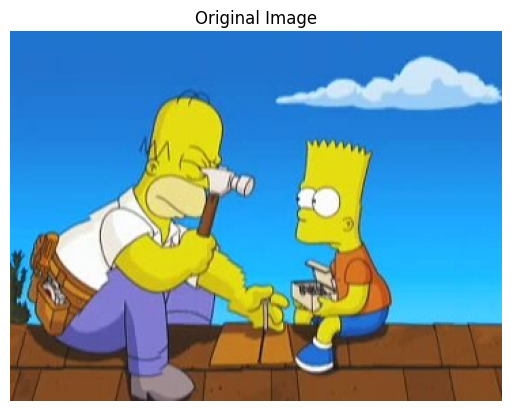

Original Image Dimensions: 362x272

Select an operation to perform:
1 - Image Reduction (X or Y displaying removed seams)
2 - Image Reduction (Both X and Y using transport map)
3 - Image Enlargement (X or Y)
4 - Content Amplification (Scaling + Seam Carving)
5 - Multi-Dimensional Image Resizing (X and Y)


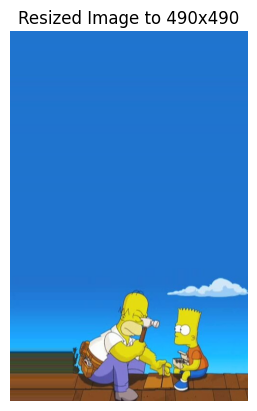

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Calculate the energy map of the image using gradient magnitude
def compute_energy(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    energy = np.absolute(gradient_x) + np.absolute(gradient_y)
    
    return energy

# Locating the horizontal seam with the least energy using dynamic programming.
def find_horizontal_seam(energy):   
    rows, cols = energy.shape
    seam = np.zeros(cols, dtype=np.int32)
    seam_energy = energy.copy()
    # Dynamic programming
    for col in range(1, cols):
        for row in range(rows):
            min_energy = seam_energy[row, col - 1]  ###  immediate left
            if row > 0:
                min_energy = min(min_energy, seam_energy[row - 1, col - 1])  ### top left
            if row < rows - 1:
                min_energy = min(min_energy, seam_energy[row + 1, col - 1])  ### bottom left
            seam_energy[row, col] += min_energy

    # Here we perform backtracking to find the seam path
    seam[-1] = np.argmin(seam_energy[:, -1])
    for col in range(cols - 2, -1, -1):
        prev_row = seam[col + 1]
        min_row = prev_row
        if prev_row > 0 and seam_energy[prev_row - 1, col] < seam_energy[min_row, col]:
            min_row = prev_row - 1
        if prev_row < rows - 1 and seam_energy[prev_row + 1, col] < seam_energy[min_row, col]:
            min_row = prev_row + 1
        seam[col] = min_row
    
    return seam

# Removing a horizontal seam from the image. This reduces the width of image by 1.
def remove_horizontal_seam(img, seam):
    rows, cols, _ = img.shape
    img_removed = np.zeros((rows - 1, cols, 3), dtype=np.uint8)  # New image with one less row
    for col in range(cols):
        row = seam[col]
        # Copying all rows except the one in the seam
        img_removed[:row, col] = img[:row, col]
        img_removed[row:, col] = img[row + 1:, col]
    
    return img_removed

# This method will draw all the horizontal seams in red
def highlight_horizontal_seams(img, seams):
    img_with_seams = img.copy()
    for seam in seams:
        for col in range(len(seam)):
            row = seam[col]
            img_with_seams[row, col] = [0, 0, 255]  # Color red
    return img_with_seams

# Locating the vertical seam with the least energy using dynamic programming.
def find_vertical_seam(energy):  
    rows, cols = energy.shape
    seam = np.zeros(rows, dtype=np.int32)
    seam_energy = energy.copy()
    # Dynamic programming
    for row in range(1, rows):
        for col in range(cols):
            min_energy = seam_energy[row - 1, col]
            if col > 0:
                min_energy = min(min_energy, seam_energy[row - 1, col - 1])
            if col < cols - 1:
                min_energy = min(min_energy, seam_energy[row - 1, col + 1])
            seam_energy[row, col] += min_energy

    # Here we perform backtracking to find the seam path
    seam[-1] = np.argmin(seam_energy[-1])
    for row in range(rows - 2, -1, -1):
        prev_col = seam[row + 1]
        min_col = prev_col
        if prev_col > 0 and seam_energy[row, prev_col - 1] < seam_energy[row, min_col]:
            min_col = prev_col - 1
        if prev_col < cols - 1 and seam_energy[row, prev_col + 1] < seam_energy[row, min_col]:
            min_col = prev_col + 1
        seam[row] = min_col
    
    return seam

# Removing a vertical seam from the image. This reduces the width of image by 1.
def remove_vertical_seam(img, seam):
    rows, cols, _ = img.shape
    img_removed = np.zeros((rows, cols - 1, 3), dtype=np.uint8)  # New image with one less column
    for row in range(rows):
        col = seam[row]
        # Copying all columns except the one in the seam
        img_removed[row, :col] = img[row, :col]  
        img_removed[row, col:] = img[row, col + 1:] 
    return img_removed

# This method will draw all the vertical seams in red
def highlight_vertical_seams(img, seams):
    img_with_seams = img.copy()
    for seam in seams:
        for row in range(len(seam)):
            col = seam[row]
            img_with_seams[row, col] = [0, 0, 255]  # Color red
    return img_with_seams

# Display the image
def display_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display the energy map
def display_energy_map(energy):
    plt.imshow(energy)
    plt.title('Energy Map')
    plt.axis('off')
    plt.show()

# Remove vertical seams from the image to reduce its width.
def compute_and_remove_vertical_seams(img, num_seams, target_width):
    seams = []
    # Compute and store all seams
    for _ in range(num_seams):
        energy = compute_energy(img)
        # Finding least energy vertical seam and remove it.
        seam = find_vertical_seam(energy)
        seams.append(seam)
        img = remove_vertical_seam(img, seam)
        # We will stop when we get our desired width
        if img.shape[1] <= target_width:
            break
    
    return img, seams

# Remove horizontal seams from the image to reduce its height.
def compute_and_remove_horizontal_seams(img, num_seams, target_height):
    seams = []
    # Compute and store all seams
    for _ in range(num_seams):
        # Compute the energy map
        energy = compute_energy(img)
        # Finding least energy horizontal seam and remove it.
        seam = find_horizontal_seam(energy)
        seams.append(seam)
        img = remove_horizontal_seam(img, seam)
        # We will stop when we get our desired height
        if img.shape[0] <= target_height:
            break
    
    return img, seams

# Calculating the transport map to optimize the order of seam removal.
def compute_transport_map(img, target_width, target_height):
    original_height, original_width = img.shape[:2]
    r, c = original_height - target_height, original_width - target_width
    
    # Initialize the transport map with high initial values
    T = np.full((r + 1, c + 1), np.inf)
    T[0, 0] = 0 
    # Dynamic progrmming
    for i in range(r + 1):
        for j in range(c + 1):
            if i > 0: 
                T[i, j] = min(T[i, j], T[i - 1, j] + np.sum(compute_energy(remove_horizontal_seam(img, find_horizontal_seam(compute_energy(img))))))
            if j > 0:  
                T[i, j] = min(T[i, j], T[i, j - 1] + np.sum(compute_energy(remove_vertical_seam(img, find_vertical_seam(compute_energy(img))))))

    return T

# Here we backtrack through the transport map to get the optimal seam removal order.
def backtrack_seam_order(T):
    r, c = T.shape
    r, c = r - 1, c - 1
    seam_order = []
    # Backtracking from the target dimensions to the original dimensions
    while r > 0 or c > 0:
        if r > 0 and (c == 0 or T[r - 1, c] < T[r, c - 1]):
            seam_order.append('horizontal')
            r -= 1
        else:
            seam_order.append('vertical')
            c -= 1
    return seam_order[::-1]  # Reversing the list to get the correct order

# In this method, we resize the image to target dimensions using an optimal seam removal strategy.
def resize_image_optimal(img, target_width, target_height):
    T = compute_transport_map(img, target_width, target_height)
    seam_order = backtrack_seam_order(T)

    for seam_type in seam_order:
        energy = compute_energy(img)
        if seam_type == 'horizontal':
            seam = find_horizontal_seam(energy)
            img = remove_horizontal_seam(img, seam)
        else:
            seam = find_vertical_seam(energy)
            img = remove_vertical_seam(img, seam)

    return img


# This method will add a vertical seam to the image by duplicating the pixels along the seam.
def add_vertical_seam(img, seam):
    rows, cols, _ = img.shape
    img_added = np.zeros((rows, cols + 1, 3), dtype=np.uint8)

    for row in range(rows):
        col = seam[row]
        for ch in range(3):  
            img_added[row, :col, ch] = img[row, :col, ch]  
            img_added[row, col, ch] = img[row, col, ch]  
            img_added[row, col + 1:, ch] = img[row, col:, ch]  

    return img_added

# This method will add a horizontal seam to the image by duplicating the pixels along the seam.
def add_horizontal_seam(img, seam):
    rows, cols, _ = img.shape
    img_added = np.zeros((rows + 1, cols, 3), dtype=np.uint8)

    for col in range(cols):
        row = seam[col]
        for ch in range(3):  
            img_added[:row, col, ch] = img[:row, col, ch]  
            img_added[row, col, ch] = img[row, col, ch]  
            img_added[row + 1:, col, ch] = img[row:, col, ch]  

    return img_added

# Calculate and add num_seams vertical seams to enlarge the image.
def compute_and_add_vertical_seams(img, num_seams):
    for _ in range(num_seams):
        energy = compute_energy(img)
        seam = find_vertical_seam(energy)
        img = add_vertical_seam(img, seam)
    return img

# Calculate and add num_seams horizontal seams to enlarge the image.
def compute_and_add_horizontal_seams(img, num_seams):
    for _ in range(num_seams):
        energy = compute_energy(img)
        seam = find_horizontal_seam(energy)
        img = add_horizontal_seam(img, seam)
    return img


# this method will amplify image content while preserving its size.
def content_amplification(img, scale_factor, target_width, target_height):
    # Scaling the image up
    scaled_width = int(img.shape[1]*scale_factor)
    scaled_height = int(img.shape[0]*scale_factor)
    scaled_img = cv2.resize(img, (scaled_width, scaled_height), interpolation=cv2.INTER_LINEAR)
    print(f"Scaled Image Dimensions: {scaled_img.shape[1]}x{scaled_img.shape[0]}")
    # Using seam carving to reduce the scaled image to the original size
    amplified_img = resize_image_optimal(scaled_img, target_width, target_height)
    
    return amplified_img

# Here we retarget the image to a new size by removing seams.
def retarget_image(img, new_width, new_height):
    resized_img = img.copy()
    # Reduce width
    while resized_img.shape[1] > new_width:
        energy = compute_energy(resized_img)
        vertical_seam = find_vertical_seam(energy)
        resized_img = remove_seam(resized_img, vertical_seam, axis=1)
    # Reduce height
    while resized_img.shape[0] > new_height:
        energy = compute_energy(resized_img)
        horizontal_seam = find_horizontal_seam(energy)
        resized_img = remove_seam(resized_img, horizontal_seam, axis=0)
    # Expand width
    while resized_img.shape[1] < new_width:
        energy = compute_energy(resized_img)
        vertical_seam = find_vertical_seam(energy)
        resized_img = add_seam(resized_img, vertical_seam, axis=1)
    # Expand height
    while resized_img.shape[0] < new_height:
        energy = compute_energy(resized_img)
        horizontal_seam = find_horizontal_seam(energy)
        resized_img = add_seam(resized_img, horizontal_seam, axis=0)

    return resized_img

def remove_seam(img, seam, axis):
    if axis == 1:  # Vertical seam
        return np.array([np.delete(row, seam[i], axis=0) for i, row in enumerate(img)])
    elif axis == 0:  # Horizontal seam
        return np.delete(img, seam, axis=0)

def add_seam(img, seam, axis):
    if axis == 1:  # Vertical seam
        new_img = []
        for i, row in enumerate(img):
            seam_idx = seam[i]
            new_pixel = np.mean(img[i, seam_idx-1:seam_idx+1], axis=0) if 0 < seam_idx < img.shape[1] - 1 else img[i, seam_idx]
            new_row = np.insert(row, seam_idx, new_pixel, axis=0)
            new_img.append(new_row)
        return np.array(new_img)
    
    elif axis == 0:  # Horizontal seam
        new_img = img.copy()
        for j in range(img.shape[1]):
            seam_idx = seam[j]
            new_pixel = np.mean(img[seam_idx-1:seam_idx+1, j], axis=0) if 0 < seam_idx < img.shape[0] - 1 else img[seam_idx, j]
            new_img = np.insert(new_img, seam_idx, new_pixel, axis=0)
        return new_img


def main(image_path, target_width, target_height, scale_factor):
    img = cv2.imread(image_path)
    if img is None:
        print("Image not found!")
        return
    
    display_image(img, f"Original Image")
    print(f"Original Image Dimensions: {img.shape[1]}x{img.shape[0]}")
    current_width, current_height = img.shape[1], img.shape[0]

    # Prompt user for choice of operation
    print("\nSelect an operation to perform:")
    print("1 - Image Reduction (X or Y displaying removed seams)")
    print("2 - Image Reduction (Both X and Y using transport map)")
    print("3 - Image Enlargement (X or Y)")
    print("4 - Content Amplification (Scaling + Seam Carving)")
    print("5 - Multi-Dimensional Image Resizing (X and Y)")
    
    user_choice = input("Enter your choice (1/2/3/4/5): ").strip()
    if user_choice == "1":
        # #### IMAGE REDUCTION EITHER X OR Y (RUN)
        # Calculate and remove seams, also store seams for highlighting
        num_seams = current_width - target_width
        resized_img, seams = compute_and_remove_vertical_seams(img, num_seams, target_width)
        # Highlight all seams in the original image
        img_with_seams = highlight_vertical_seams(img, seams)
        display_image(img_with_seams, "Image with All Vertical Seams Highlighted")
        display_image(resized_img, f"Resized Image from {current_width} width to {target_width} width")
        print(img.shape)
        resized_img, seams = compute_and_remove_horizontal_seams(img, num_seams, target_height)
        # Highlight all seams in the original image
        img_with_seams = highlight_horizontal_seams(img, seams)
        display_image(img_with_seams, "Image with All Horizontal Seams Highlighted")
        display_image(resized_img, f"Resized Image from {current_height} height to {target_height} height")
        print(img.shape)

    if user_choice == "2":
        # Part 1 - Image Reduction (X and Y)
        optimal_resized_img = resize_image_optimal(img, target_width, target_height)
        display_image(optimal_resized_img, f"Optimally Resized Image ({target_width}x{target_height})")

    elif user_choice == "3":
        # Part 2 - Image Enlargement (X or Y)
        current_width, current_height = img.shape[1], img.shape[0]
        print(f"Current dimensions: {current_width}x{current_height}")

        num_vertical_seams = target_width - current_width
        num_horizontal_seams = target_height - current_height
        print(f"Vertical seams to add: {num_vertical_seams}, Horizontal seams to add: {num_horizontal_seams}")

        if num_vertical_seams > 0:
            img_with_vertical_seams = compute_and_add_vertical_seams(img, num_vertical_seams)
            display_image(img_with_vertical_seams, f"Image with {target_width} width")

        if num_horizontal_seams > 0:
            img_with_horizontal_seams = compute_and_add_horizontal_seams(img_with_vertical_seams, num_horizontal_seams)
            display_image(img_with_horizontal_seams, f"Image with {target_width} width x {target_height} height")

    elif user_choice == "4":
        # Part 3 - Content Amplification
        amplified_img = content_amplification(img, scale_factor, target_width, target_height)
        display_image(amplified_img, "Content Amplified Image")

    elif user_choice == "5":
        # Part 4 - Multi-Size Retargeting
        resized_img = retarget_image(img, target_width, target_height)
        display_image(resized_img, f"Resized Image to {target_width}x{target_height}")

    else:
        print("Invalid choice! Please select a valid option.")


image_path = 'buffy.png' 
target_width = int(input("Enter target width : "))
target_height = int(input("Enter target height : "))
scale_factor = 1.2
main(image_path, target_width, target_height ,scale_factor)

In [ ]:
# def main(image_path, target_width, scale_factor):
#     img = cv2.imread(image_path)
#     if img is None:
#         print("Image not found!")
#         return
    
#     display_image(img, f"Original Image")
#     current_width = img.shape[1]
#     current_height = img.shape[0]
#     print(f"Current image width: {current_width} {current_height}")

#     num_seams = current_width - target_width
#     print(f"Number of seams to remove: {num_seams}")

#     energy = compute_energy(img)
#     display_energy_map(energy)
    
#     # Prompt user for choice of operation
#     print("\nSelect an operation to perform:")
#     print("1 - Image Reduction (X or Y)")
#     print("2 - Image Reduction (Both X and Y using transport map)")
#     print("3 - Image Enlargement (X or Y)")
#     print("4 - Image Enlargement using Content Amplification (Scaling + Seam Carving)")
#     print("5 - Multi Size Retargeting (X and Y)")
    
#     user_choice = input("Enter your choice (1/2/3/4/5): ").strip()
    
    # if user_choice == "1":
    #     # #### IMAGE REDUCTION EITHER X OR Y (RUN)
    #     # # Calculate and remove seams, also store seams for highlighting
    #     resized_img, seams = compute_and_remove_vertical_seams(img, num_seams, target_width)

    #     # Highlight all seams in the original image
    #     img_with_seams = highlight_vertical_seams(img, seams)

    #     # Displaying the image with all seams highlighted
    #     display_image(img_with_seams, "Image with All Vertical Seams Highlighted")

    #     # Displaying the resized image
    #     display_image(resized_img, f"Resized Image from {current_width} width to {target_width} width")
    #     print(img.shape)

    #     resized_img, seams = compute_and_remove_horizontal_seams(img, num_seams, target_height)
    #     # Highlight all seams in the original image
    #     img_with_seams = highlight_horizontal_seams(img, seams)

    #     # Displaying the image with all seams highlighted
    #     display_image(img_with_seams, "Image with All Horizontal Seams Highlighted")

    #     # Displaying the resized image
    #     display_image(resized_img, f"Resized Image from {current_height} height to {target_height} height")
    #     print(img.shape)

#     elif user_choice == "2":
#         ### IMAGE REDUCTION BOTH X AND Y (WILL TAKE 15 TO 20 MINS)
#         # Image resizing in both x and y using transport map
#         optimal_resized_img = resize_image_optimal(img, target_width, target_height)
#         display_image(optimal_resized_img, f"Optimally Resized Image ({target_width}x{target_height})")


#     elif user_choice == "3":
#         # ### IMAGE ENLARGEMENT EITHER X OOR Y
#         current_width, current_height = img.shape[1], img.shape[0]
#         print(f"Current dimensions: {current_width}x{current_height}")

#         # Calculate the number of seams to add for enlargement
#         num_vertical_seams = target_width - current_width
#         num_horizontal_seams = target_height - current_height
#         print(f"Vertical seams to add: {num_vertical_seams}, Horizontal seams to add: {num_horizontal_seams}")

#         # Add vertical seams
#         if num_vertical_seams > 0:
#             img_with_vertical_seams = compute_and_add_vertical_seams(img, num_vertical_seams)
#             display_image(img_with_vertical_seams, f"Image with {target_width} width")

#         # Add horizontal seams
#         if num_horizontal_seams > 0:
#             img_with_horizontal_seams = compute_and_add_horizontal_seams(img_with_vertical_seams, num_horizontal_seams)
#             display_image(img_with_horizontal_seams, f"Image with {target_width} weight x {target_height} height")


#     elif user_choice == "4":
#         # ### IMAGE ENLARGEMENT IN X AND Y (Take around 30-40 mins)
#         current_width, current_height = img.shape[1], img.shape[0]
#         print(f"Original Image Dimensions: {current_width}x{current_height}")

#         # Performing content amplification
#         amplified_img = content_amplification(img, scale_factor, current_width, current_height)

#         # Displaying the amplified image
#         display_image(amplified_img, "Content Amplified Image")
        
        
#     elif user_choice == "5":    
#         ### MUTI SIZE RETARGETING
#         # Compute energy map
#         energy = compute_energy(img)

#         # Retarget the image
#         resized_img = retarget_image(img, target_width, target_height)
#         display_image(resized_img, f"Resized Image to {target_width}x{target_height}")

        
#     else:
#         print("Invalid choice! Please select a valid option.")
